In [25]:
# import initial libraries
import pandas as pd
import numpy as np
from numpy import NaN
import seaborn as sns
from scipy import stats
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt

In [29]:
def df_style(val):
              return 'font-weight: bold'

In [2]:
train = pd.read_csv('/Users/dad/Downloads/mercari-price-suggestion-challenge/train.tsv', sep = '\t', low_memory=True)
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [42]:
#function to get all info in one go
def full_info(df):
    df_column=[]
    df_dtype=[]
    df_null=[]
    df_nullc=[]
    df_mean=[]
    df_median=[]
    df_std=[]
    df_min=[]
    df_max=[]
    df_uniq=[]
    df_count=[]
    for col in df.columns: 
        df_column.append(  col )
        df_dtype.append( df[col].dtype)
        df_null.append( round(100 * df[col].isnull().sum(axis=0)/len(df[col]),2))
        df_nullc.append( df[col].isnull().sum(axis=0))
        df_uniq.append( df[col].nunique()) if df[col].dtype == 'object' else df_uniq.append( NaN)
        df_mean.append(  '{0:.2f}'.format(df[col].mean())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_mean.append( NaN)
        df_median.append( '{0:.2f}'.format(df[col].median())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_median.append( NaN)
        df_std.append( '{0:.2f}'.format(df[col].std())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_std.append( NaN)
        df_max.append( '{0:.2f}'.format(df[col].max())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_max.append( NaN)
        df_min.append( '{0:.2f}'.format(df[col].min())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_min.append( NaN)
        df_count.append(df[col].count())
    return pd.DataFrame(data = {'ColName':  df_column, 'ColType': df_dtype, 'NullCnt': df_nullc, 'NullCntPrcntg': df_null,  'Min': df_min, 'Max': df_max, 'Mean': df_mean, 'Med': df_median, 'Std': df_std, 'UniqCnt': df_uniq, 'ColValCnt': df_count})


In [43]:
full_info(train)

,ColName,ColType,NullCnt,NullCntPrcntg,Min,Max,Mean,Med,Std,UniqCnt,ColValCnt
0,train_id,int64,0,0.00,0.00,1482534.00,741267.00,741267.00,427971.14,NaN,1482535
1,name,object,0,0.00,NaN,NaN,NaN,NaN,NaN,1225273.0,1482535
2,item_condition_id,int64,0,0.00,1.00,5.00,1.91,2.00,0.90,NaN,1482535
3,category_name,object,6327,0.43,NaN,NaN,NaN,NaN,NaN,1287.0,1476208
4,brand_name,object,632682,42.68,NaN,NaN,NaN,NaN,NaN,4809.0,849853
5,price,float64,0,0.00,0.00,2009.00,26.74,17.00,38.59,NaN,1482535
6,shipping,int64,0,0.00,0.00,1.00,0.45,0.00,0.50,NaN,1482535
7,item_description,object,4,0.00,NaN,NaN,NaN,NaN,NaN,1281426.0,1482531


In [5]:
print(train['category_name'].str.count('/').min())
print(train['category_name'].str.count('/').max())

2.0
4.0


In [6]:
train_sp = train.join(train['category_name'].str.split('/', expand=True).add_prefix('category'))

train_sp.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category0,category1,category2,category3,category4
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,None,None
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,None,None
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,None,None
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,None,None
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,None,None


In [7]:
train_sp_info = full_info(train_sp)
train_sp_info

,ColName,ColType,NullCnt,NullCntPrcntg,Min,Max,Mean,Med,Std,UniqCnt,ColValCnt
0,train_id,int64,0,0.00,0.00,1482534.00,741267.00,741267.00,427971.14,NaN,1482535
1,name,object,0,0.00,NaN,NaN,NaN,NaN,NaN,1225273.0,1482535
2,item_condition_id,int64,0,0.00,1.00,5.00,1.91,2.00,0.90,NaN,1482535
3,category_name,object,6327,0.43,NaN,NaN,NaN,NaN,NaN,1287.0,1476208
4,brand_name,object,632682,42.68,NaN,NaN,NaN,NaN,NaN,4809.0,849853
5,price,float64,0,0.00,0.00,2009.00,26.74,17.00,38.59,NaN,1482535
6,shipping,int64,0,0.00,0.00,1.00,0.45,0.00,0.50,NaN,1482535
7,item_description,object,4,0.00,NaN,NaN,NaN,NaN,NaN,1281426.0,1482531
8,category0,object,6327,0.43,NaN,NaN,NaN,NaN,NaN,10.0,1476208
9,category1,object,6327,0.43,NaN,NaN,NaN,NaN,NaN,113.0,1476208


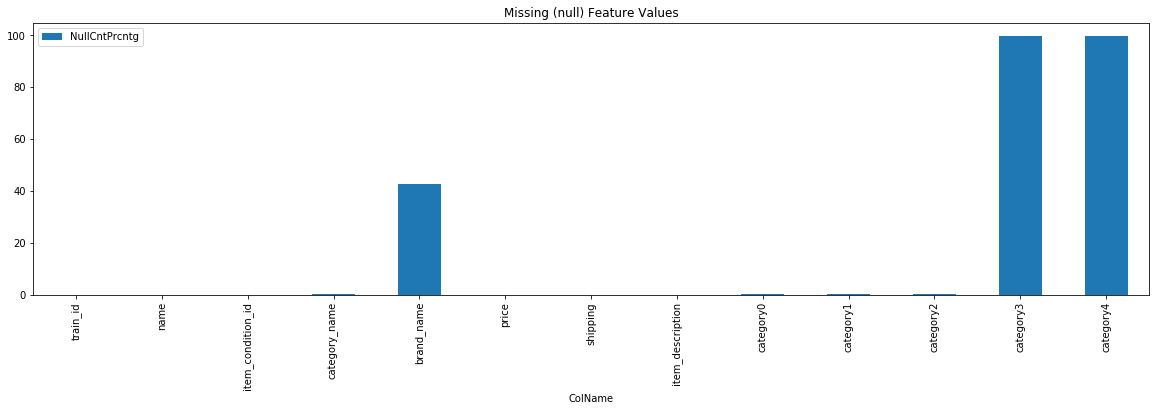

In [8]:
# lets visualize the Null Count percentage graphically
train_sp_info.plot.bar(x = 'ColName', y = 'NullCntPrcntg', figsize=(20, 5),rot=90, title='Missing (null) Feature Values')
plt.show()

In [60]:
# drop the object dtype columns
train_sp_trim=train_sp.drop(['category3', 'category4'],axis=1)
train_sp_trim

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category0,category1,category2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [61]:
# Remove items with price of $0 from our training set
train_sp_trim = train_sp_trim[train_sp_trim.price != 0]


In [11]:
# Create a function to impute missing values
def fill_missing_value(df):
    df['category0'].fillna(value = 'unknown', inplace=True)
    df['category1'].fillna(value = 'unknown', inplace=True)
    df['category2'].fillna(value = 'unknown', inplace=True)
    df['brand_name'].fillna(value = 'unknown', inplace=True)
    df['item_description'].fillna(value = 'No description yet', inplace=True)
    
    return df

In [62]:

train_fill = fill_missing_value(train_sp_trim)
full_info(train_fill)

/Users/dad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,ColName,ColType,NullCnt,NullCntPrcntg,Min,Max,Mean,Med,Std,UniqCnt,ColValCnt
0,train_id,int64,0,0.00,0.00,1482534.00,741243.72,741238.00,427971.46,NaN,1481661
1,name,object,0,0.00,NaN,NaN,NaN,NaN,NaN,1224596.0,1481661
2,item_condition_id,int64,0,0.00,1.00,5.00,1.91,2.00,0.90,NaN,1481661
3,category_name,object,6314,0.43,NaN,NaN,NaN,NaN,NaN,1287.0,1475347
4,brand_name,object,0,0.00,NaN,NaN,NaN,NaN,NaN,4808.0,1481661
5,price,float64,0,0.00,3.00,2009.00,26.75,17.00,38.59,NaN,1481661
6,shipping,int64,0,0.00,0.00,1.00,0.45,0.00,0.50,NaN,1481661
7,item_description,object,0,0.00,NaN,NaN,NaN,NaN,NaN,1280671.0,1481661
8,category0,object,0,0.00,NaN,NaN,NaN,NaN,NaN,11.0,1481661
9,category1,object,0,0.00,NaN,NaN,NaN,NaN,NaN,114.0,1481661


In [13]:
print('\n category0: \n ********************* \n' + str(train_fill.category0.unique()) )
print('\n category1: \n ********************* \n' + str(train_fill.category1.unique()) )
print('\n category2: \n ********************* \n' + str(train_fill.category2.unique()) )
print('\n brand_name: \n ********************* \n' + str(train_fill.brand_name.unique()) )


 category0: 
 ********************* 
['Men' 'Electronics' 'Women' 'Home' 'Sports & Outdoors'
 'Vintage & Collectibles' 'Beauty' 'Other' 'Kids' 'unknown' 'Handmade']

 category1: 
 ********************* 
['Tops' 'Computers & Tablets' 'Tops & Blouses' 'Home Décor' 'Jewelry'
 'Other' 'Swimwear' 'Apparel' 'Collectibles' 'Makeup' 'Fragrance'
 'Dresses' 'Office supplies' 'Shoes' 'Gear' 'Athletic Apparel'
 'Cell Phones & Accessories' 'Jeans' 'Underwear' 'Skin Care' 'Toys'
 "Women's Handbags" 'Video Games & Consoles' 'Coats & Jackets' 'Pants'
 'Girls (4+)' 'Antique' 'Kitchen & Dining' 'Sweaters' 'Boys 0-24 Mos'
 'Girls 0-24 Mos' 'Maternity' 'Bedding' 'Exercise' 'Trading Cards'
 'Boys (4+)' 'Storage & Organization' 'Fan Shop' 'Girls 2T-5T'
 "Men's Accessories" 'Boys 2T-5T' "Women's Accessories"
 'Daily & Travel items' 'unknown' 'Skirts' 'Hair Care' 'Pet Supplies'
 'Book' 'Tools & Accessories' 'Team Sports' 'Home Appliances'
 'Accessories' 'Bags and Purses' 'Sweats & Hoodies' 'Shorts'
 'TV, Aud


 brand_name: 
 ********************* 
['unknown' 'Razer' 'Target' 'Acacia Swimwear' 'Soffe' 'Nike' 'Smashbox'
 "Victoria's Secret" 'rue' 'Scholastic' 'UGG Australia' 'Tarte'
 'Wet n Wild' 'Too Faced' 'Anthropologie' 'Torrid' 'Samsung' 'FOREVER 21'
 'Air Jordan' 'Apple' 'LuLaRoe' 'Hollister' 'PINK' 'Sephora'
 'Under Armour' 'Xbox' 'Kylie Cosmetics' 'The North Face'
 'Brandy Melville' 'lululemon athletica' 'Michael Kors' 'Rae Dunn'
 'Infantino' "Levi's®" 'patagonia' 'Barbie' 'H&M' 'Adidas'
 'Nostalgia Electrics' 'Littlest Pet Shop' 'Sea Wees'
 'Motherhood Maternity' 'Melissa & Doug' 'Pokemon' 'Nintendo'
 'Silver Jeans Co.' 'Spin Master' 'Gap' 'Lululemon' 'Rock Revival'
 'Fossil' 'Merona' 'Boulevard Boutique' 'MARC JACOBS' 'Steve Madden'
 'No Boundaries' 'Faded Glory' 'Miss Me' 'Salvatore Ferragamo'
 'Urban Outfitters' 'Bath & Body Works' 'Nars' 'Manolo Blahnik'
 'Ralph Lauren' 'LC Lauren Conrad' 'Kate Spade' 'Elmers' 'Leap Frog'
 'beautyblender®' 'PANDORA' 'Sony' 'aerie' 'GUESS' 'Youniq

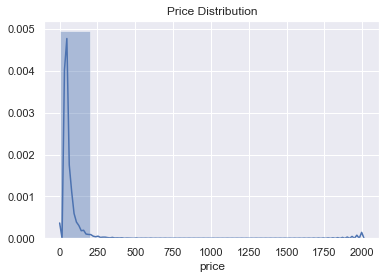

In [20]:
# histogram of dependent variable price
sns.set()
sns.distplot(train_fill['price'], bins = 10)
plt.title('Price Distribution', fontsize=12);

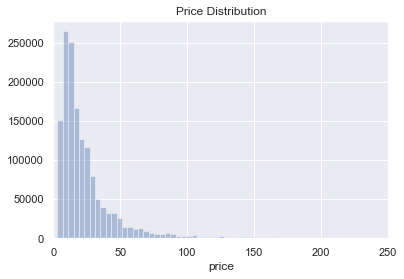

In [24]:
plt.xlim(0, 250)
sns.distplot(train_fill['price'], kde=False, bins = 500)
plt.title('Price Distribution', fontsize=12);

In [26]:
stats.skew(train_fill['price'])


11.393672464360412

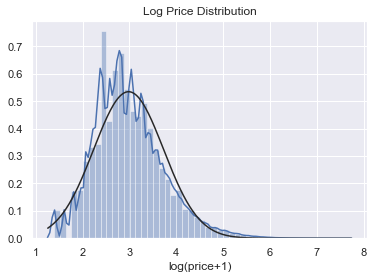

In [27]:
sns.distplot(np.log(train_fill['price']+1), fit = stats.norm)
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Log Price Distribution', fontsize=12);

In [28]:
stats.skew(np.log(train_fill['price']+1))


0.6990676655182686

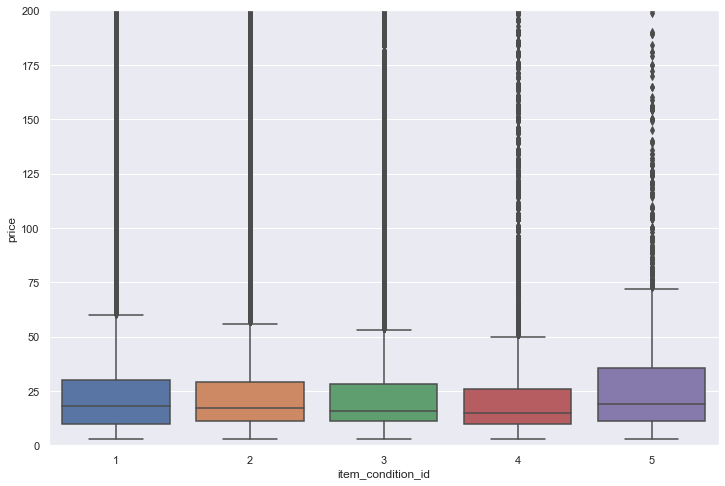

In [44]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='item_condition_id', y="price", data=train_fill)
plt.ylim(0, 200);

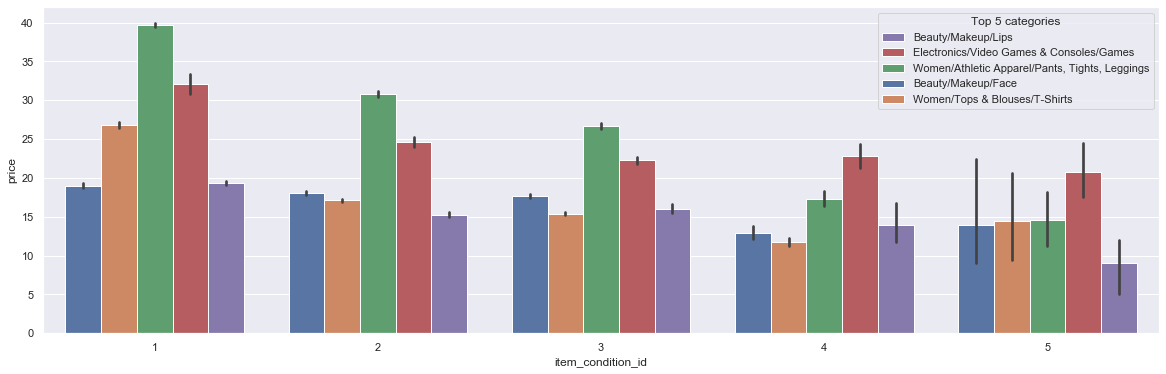

In [63]:
plt.figure(figsize=(20, 6))
sns.barplot(x='item_condition_id', y="price", hue='category_name', data=train_fill[(train_fill['category_name'] == train_fill['category_name'].value_counts().index[0]) | (train_fill['category_name'] == train_fill['category_name'].value_counts().index[1]) | (train_fill['category_name'] == train_fill['category_name'].value_counts().index[2]) | (train_fill['category_name'] == train_fill['category_name'].value_counts().index[3]) | (train_fill['category_name'] == train_fill['category_name'].value_counts().index[4])])
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[4], handles[3], handles[2], handles[0], handles[1]]
labels = [labels[4], labels[3], labels[2], labels[0], labels[1]]
plt.legend(handles, labels, title='Top 5 categories', loc='upper right');

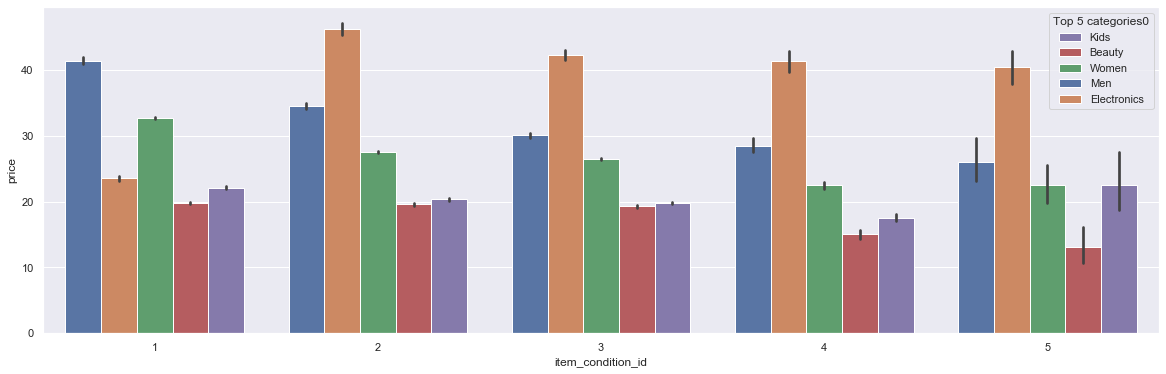

In [57]:
plt.figure(figsize=(20, 6))
sns.barplot(x='item_condition_id', y="price", hue='category0', data=train_fill[(train_fill['category0'] == train_fill['category0'].value_counts().index[0]) | (train_fill['category0'] == train_fill['category0'].value_counts().index[1]) | (train_fill['category0'] == train_fill['category0'].value_counts().index[2]) | (train_fill['category0'] == train_fill['category0'].value_counts().index[3]) | (train_fill['category0'] == train_fill['category0'].value_counts().index[4])])
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[4], handles[3], handles[2], handles[0], handles[1]]
labels = [labels[4], labels[3], labels[2], labels[0], labels[1]]
plt.legend(handles, labels, title='Top 5 categories0', loc='upper right');

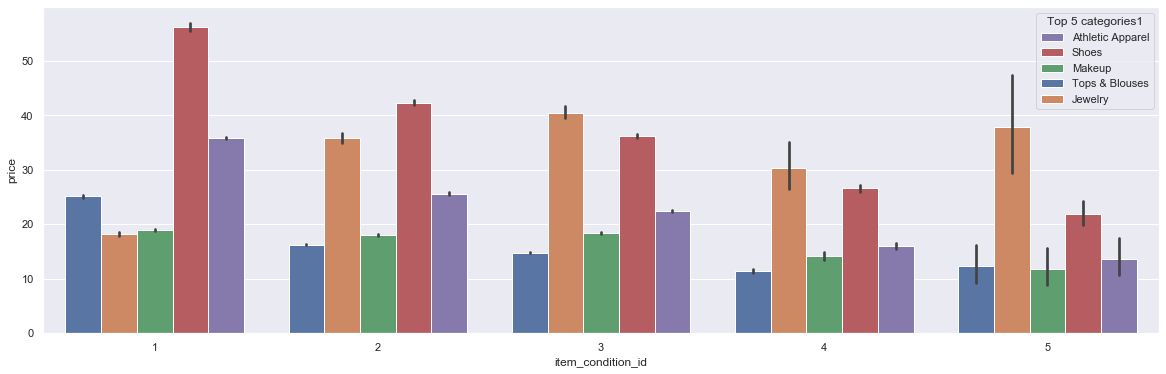

In [58]:
plt.figure(figsize=(20, 6))
sns.barplot(x='item_condition_id', y="price", hue='category1', data=train_fill[(train_fill['category1'] == train_fill['category1'].value_counts().index[0]) | (train_fill['category1'] == train_fill['category1'].value_counts().index[1]) | (train_fill['category1'] == train_fill['category1'].value_counts().index[2]) | (train_fill['category1'] == train_fill['category1'].value_counts().index[3]) | (train_fill['category1'] == train_fill['category1'].value_counts().index[4])])
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[4], handles[3], handles[2], handles[0], handles[1]]
labels = [labels[4], labels[3], labels[2], labels[0], labels[1]]
plt.legend(handles, labels, title='Top 5 categories1', loc='upper right');

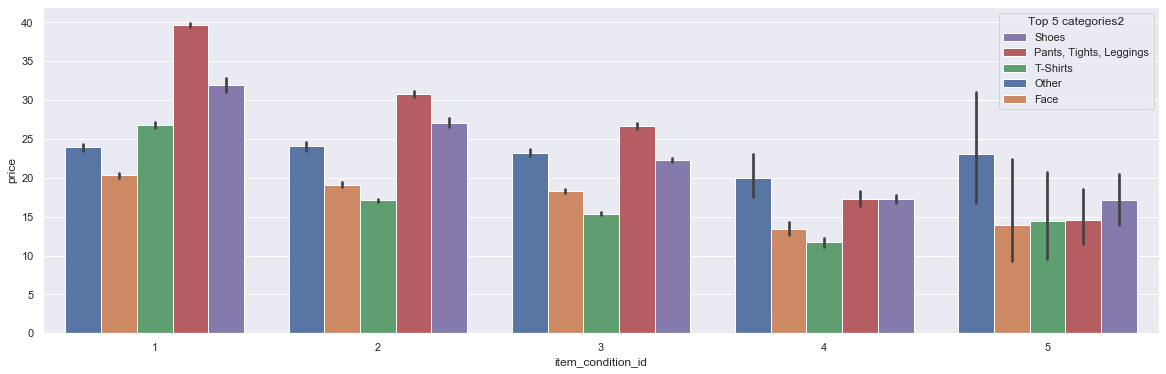

In [59]:
plt.figure(figsize=(20, 6))
sns.barplot(x='item_condition_id', y="price", hue='category2', data=train_fill[(train_fill['category2'] == train_fill['category2'].value_counts().index[0]) | (train_fill['category2'] == train_fill['category2'].value_counts().index[1]) | (train_fill['category2'] == train_fill['category2'].value_counts().index[2]) | (train_fill['category2'] == train_fill['category2'].value_counts().index[3]) | (train_fill['category2'] == train_fill['category2'].value_counts().index[4])])
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[4], handles[3], handles[2], handles[0], handles[1]]
labels = [labels[4], labels[3], labels[2], labels[0], labels[1]]
plt.legend(handles, labels, title='Top 5 categories2', loc='upper right');

In [52]:
# define function for text normalization
import string

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords
from nltk.stem.porter import PorterStemmer

def text_normalization(text):
    # lowercase words
    text = text.lower()
    # remove stopwords
    text = ' '.join([i for i in text.split(' ') if i not in stopwords])
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # stemming
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [54]:
%%time

train_fill['item_description_normalized'] = train_fill['item_description'].apply(text_normalization).copy()

CPU times: user 6min 49s, sys: 560 ms, total: 6min 50s
Wall time: 6min 51s


/Users/dad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
train_fill.to_pickle("./df_preprocessed.pkl")